<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#NY-State-Hate-Crimes-data" data-toc-modified-id="NY-State-Hate-Crimes-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>NY State Hate Crimes data</a></span><ul class="toc-item"><li><span><a href="#Import-libraries-&amp;-data" data-toc-modified-id="Import-libraries-&amp;-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import libraries &amp; data</a></span></li><li><span><a href="#Initial-high-level-examination-of-data" data-toc-modified-id="Initial-high-level-examination-of-data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Initial high level examination of data</a></span></li><li><span><a href="#Dropping-columns-of-0s" data-toc-modified-id="Dropping-columns-of-0s-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Dropping columns of 0s</a></span><ul class="toc-item"><li><span><a href="#Note:-To-be-clear,-Counts-are-numbers-of-incidents" data-toc-modified-id="Note:-To-be-clear,-Counts-are-numbers-of-incidents-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Note: To be clear, Counts are numbers of incidents</a></span></li></ul></li><li><span><a href="#Hate-Crimes-by-NY-County-plot" data-toc-modified-id="Hate-Crimes-by-NY-County-plot-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Hate Crimes by NY County plot</a></span></li></ul></li><li><span><a href="#Country,-year,-crime-type-dummy-variables" data-toc-modified-id="Country,-year,-crime-type-dummy-variables-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Country, year, crime type dummy variables</a></span></li><li><span><a href="#Modeling----predicting-w/regression-Anti-Gay-Male-crime" data-toc-modified-id="Modeling----predicting-w/regression-Anti-Gay-Male-crime-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Modeling -- predicting w/regression Anti-Gay Male crime</a></span><ul class="toc-item"><li><span><a href="#Creating-x/y-test/train-split" data-toc-modified-id="Creating-x/y-test/train-split-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Creating x/y test/train split</a></span></li><li><span><a href="#Decision-Tree-Regression" data-toc-modified-id="Decision-Tree-Regression-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Decision Tree Regression</a></span><ul class="toc-item"><li><span><a href="#Residiuals-plot----DT-Regressor" data-toc-modified-id="Residiuals-plot----DT-Regressor-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Residiuals plot -- DT Regressor</a></span></li></ul></li><li><span><a href="#AdaBoostRegressor" data-toc-modified-id="AdaBoostRegressor-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>AdaBoostRegressor</a></span></li><li><span><a href="#Lasso" data-toc-modified-id="Lasso-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Lasso</a></span></li><li><span><a href="#Elastic-Net" data-toc-modified-id="Elastic-Net-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Elastic Net</a></span></li></ul></li><li><span><a href="#Deep-Learning" data-toc-modified-id="Deep-Learning-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Deep Learning</a></span></li><li><span><a href="#Kerasregressor-(Source:-https://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/-)" data-toc-modified-id="Kerasregressor-(Source:-https://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/-)-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Kerasregressor (Source: <a href="https://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/" target="_blank">https://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/</a> )</a></span><ul class="toc-item"><li><span><a href="#Wide-chungus-model" data-toc-modified-id="Wide-chungus-model-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Wide chungus model</a></span></li></ul></li><li><span><a href="#Grid-chungus-search" data-toc-modified-id="Grid-chungus-search-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Grid chungus search</a></span></li></ul></div>

# NY State Hate Crimes data
## Import libraries & data

In [1]:
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 
import pandas as pd 
import missingno as msno 
import yellowbrick 

/Users/michaelburak/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
from sklearn.model_selection import GridSearchCV

In [3]:
from yellowbrick.style import set_palette
set_palette('flatui')
sns.set_context("poster")
# plt.style.use('fivethirtyeight')

In [4]:
df = pd.read_csv("hate-crimes-by-county-and-bias-type-beginning-2010.csv")

df.head(20)

,County,Year,Crime Type,Anti-Male,Anti-Female,Anti-Transgender,Anti-Gender Identity Expression,Anti-Age*,Anti-White,Anti-Black,...,Anti-Gay Male,Anti-Gay Female,Anti-Gay (Male and Female),Anti-Heterosexual,Anti-Bisexual,Anti-Physical Disability,Anti-Mental Disability,Total Incidents,Total Victims,Total Offenders
0,Albany,2016,Crimes Against Persons,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,3,4,3
1,Albany,2016,Property Crimes,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,3,3,3
2,Allegany,2016,Property Crimes,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,1
3,Bronx,2016,Crimes Against Persons,0,0,4,0,0,1,0,...,8,1,0,0,0,0,0,20,20,25
4,Bronx,2016,Property Crimes,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,2,2,2
5,Broome,2016,Crimes Against Persons,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,3,3,3
6,Cayuga,2016,Property Crimes,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
7,Chemung,2016,Crimes Against Persons,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,1
8,Chemung,2016,Property Crimes,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
9,Chenango,2016,Crimes Against Persons,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,2,2,2


## Initial high level examination of data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423 entries, 0 to 422
Data columns (total 44 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   County                                        423 non-null    object
 1   Year                                          423 non-null    int64 
 2   Crime Type                                    423 non-null    object
 3   Anti-Male                                     423 non-null    int64 
 4   Anti-Female                                   423 non-null    int64 
 5   Anti-Transgender                              423 non-null    int64 
 6   Anti-Gender Identity Expression               423 non-null    int64 
 7   Anti-Age*                                     423 non-null    int64 
 8   Anti-White                                    423 non-null    int64 
 9   Anti-Black                                    423 non-null    int64 
 10  An

In [6]:
df.nunique()

County                                          60
Year                                             7
Crime Type                                       2
Anti-Male                                        2
Anti-Female                                      2
Anti-Transgender                                 5
Anti-Gender Identity Expression                  4
Anti-Age*                                        5
Anti-White                                       9
Anti-Black                                      14
Anti-American Indian/Alaskan Native              2
Anti-Asian                                       7
Anti-Native Hawaiian/Pacific Islander            1
Anti-Multi-Racial Groups                         4
Anti-Other Race                                  1
Anti-Jewish                                     35
Anti-Catholic                                    9
Anti-Protestant                                  2
Anti-Islamic (Muslim)                           10
Anti-Multi-Religious Groups    

## Dropping columns of 0s

In [7]:
df = df.drop(columns=['Anti-Native Hawaiian/Pacific Islander','Anti-Other Race','Anti-Atheism/Agnosticism',
                      'Anti-Buddhist','Anti-Jehovahs Witness','Anti-Mormon','Anti-Sikh','Anti-Non-Hispanic*'],axis=1)

In [8]:
df.nunique()

County                                          60
Year                                             7
Crime Type                                       2
Anti-Male                                        2
Anti-Female                                      2
Anti-Transgender                                 5
Anti-Gender Identity Expression                  4
Anti-Age*                                        5
Anti-White                                       9
Anti-Black                                      14
Anti-American Indian/Alaskan Native              2
Anti-Asian                                       7
Anti-Multi-Racial Groups                         4
Anti-Jewish                                     35
Anti-Catholic                                    9
Anti-Protestant                                  2
Anti-Islamic (Muslim)                           10
Anti-Multi-Religious Groups                      5
Anti-Religious Practice Generally                3
Anti-Other Religion            

### Note: To be clear, Counts are numbers of incidents

In [9]:
df['Anti-Male'].value_counts()

0    420
1      3
Name: Anti-Male, dtype: int64

In [10]:
df['Anti-Female'].value_counts()

0    416
1      7
Name: Anti-Female, dtype: int64

In [11]:
df['Anti-Age*'].value_counts()

0    414
1      6
9      1
5      1
2      1
Name: Anti-Age*, dtype: int64

## Hate Crimes by NY County plot

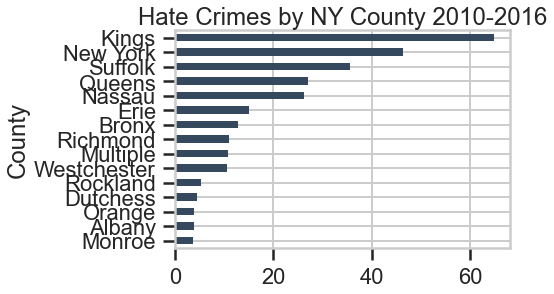

In [12]:
x = df.groupby('County')['Total Incidents'].mean().sort_values().tail(15)
x.plot(kind='barh')
ax = plt.gca()
ax.set_title("Hate Crimes by NY County 2010-2016")
fig = plt.gcf()
fig.savefig('top_15_counties_hc.png')

In [13]:
df.columns

Index(['County', 'Year', 'Crime Type', 'Anti-Male', 'Anti-Female',
       'Anti-Transgender', 'Anti-Gender Identity Expression', 'Anti-Age*',
       'Anti-White', 'Anti-Black', 'Anti-American Indian/Alaskan Native',
       'Anti-Asian', 'Anti-Multi-Racial Groups', 'Anti-Jewish',
       'Anti-Catholic', 'Anti-Protestant', 'Anti-Islamic (Muslim)',
       'Anti-Multi-Religious Groups', 'Anti-Religious Practice Generally',
       'Anti-Other Religion', 'Anti-Eastern Orthodox (Greek, Russian, etc.)',
       'Anti-Hindu', 'Anti-Other Christian', 'Anti-Hispanic', 'Anti-Arab',
       'Anti-Other Ethnicity/National Origin', 'Anti-Gay Male',
       'Anti-Gay Female', 'Anti-Gay (Male and Female)', 'Anti-Heterosexual',
       'Anti-Bisexual', 'Anti-Physical Disability', 'Anti-Mental Disability',
       'Total Incidents', 'Total Victims', 'Total Offenders'],
      dtype='object')

# Country, year, crime type dummy variables

In [14]:
df = pd.get_dummies(df, columns=['County', 'Year',"Crime Type"], prefix='', prefix_sep='') 

df.columns

Index(['Anti-Male', 'Anti-Female', 'Anti-Transgender',
       'Anti-Gender Identity Expression', 'Anti-Age*', 'Anti-White',
       'Anti-Black', 'Anti-American Indian/Alaskan Native', 'Anti-Asian',
       'Anti-Multi-Racial Groups',
       ...
       'Westchester', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       'Crimes Against Persons', 'Property Crimes'],
      dtype='object', length=102)

# Modeling -- predicting w/regression Anti-Gay Male crime

## Creating x/y test/train split

In [15]:
X = df.drop("Anti-Gay Male", axis=1)
X = X.drop(columns=['Total Incidents', 'Total Victims', 'Total Offenders'],axis=1)
y = df['Anti-Gay Male']

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

## Decision Tree Regression

In [17]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [18]:
y_pred = regressor.predict(X_test)
# pred_df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
# pred_df

In [19]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score", metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 1.1529411764705881
Mean Squared Error: 6.541176470588235
Root Mean Squared Error: 2.5575723783674698
R2 Score -0.11017148226450524


Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.01024
Feature: 4, Score: 0.00009
Feature: 5, Score: 0.00096
Feature: 6, Score: 0.01851
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.49984
Feature: 9, Score: 0.00018
Feature: 10, Score: 0.13593
Feature: 11, Score: 0.00270
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.04751
Feature: 14, Score: 0.00028
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.02062
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.04410
Feature: 21, Score: 0.00088
Feature: 22, Score: 0.01159
Feature: 23, Score: 0.17662
Feature: 24, Score: 0.00191
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00513
Feature: 29, Score: 0.00009
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00096
Feature: 32, Score: 0.00003
Feature: 33, Score: 0.00003
Feature: 34, Score: 0.00004
Feature: 35, Score: 0.00000
Fe

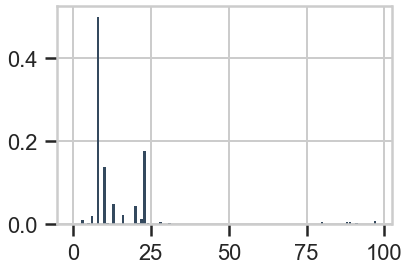

In [20]:
# get importance
importance = regressor.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [22]:
#doesn't say much
X_train.columns[31]

'Bronx'

In [23]:
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

def select_features(X_train, y_train, X_test,max_features):
# configure to select a subset of features
    fs = SelectFromModel(DecisionTreeRegressor(random_state=0), max_features=max_features)
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test, 20)
# fit the model
model = DecisionTreeRegressor(random_state=0)
model.fit(X_train_fs, y_train)
# evaluate the model
y_pred = model.predict(X_test_fs)
# evaluate predictions
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score", metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 1.0722467741194839
Mean Squared Error: 5.738891799948861
Root Mean Squared Error: 2.395598422096003
R2 Score 0.025992641422821094


In [24]:
from sklearn.ensemble import RandomForestRegressor

In [25]:
regressor = RandomForestRegressor(random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score", metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 0.846
Mean Squared Error: 2.9124317647058824
Root Mean Squared Error: 1.706584824937185
R2 Score 0.5057007399577169


In [27]:
# X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test, 100)
# # fit the model
# model = RandomForestRegressor(random_state=0)
# model.fit(X_train_fs, y_train)
# # evaluate the model
# y_pred = model.predict(X_test_fs)
# # evaluate predictions
# print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
# print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
# print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# print("R2 Score", metrics.r2_score(y_test,y_pred))

### Residiuals plot -- DT Regressor

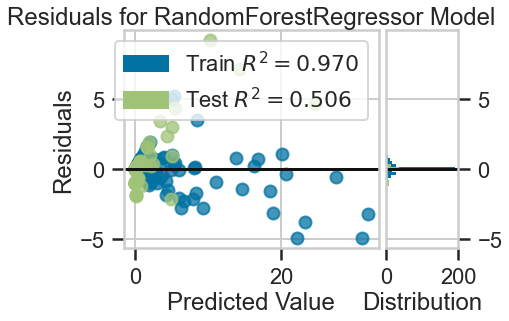

In [28]:
from sklearn.ensemble import RandomForestRegressor
from yellowbrick.regressor import residuals_plot

# Create the visualizer, fit, score, and show it
viz = residuals_plot(RandomForestRegressor(random_state=0), X_train, y_train, X_test, y_test)

## AdaBoostRegressor

In [29]:
from sklearn.ensemble import AdaBoostRegressor
regr = AdaBoostRegressor(random_state=0, n_estimators=1000)
regr.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score", metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 0.846
Mean Squared Error: 2.9124317647058824
Root Mean Squared Error: 1.706584824937185
R2 Score 0.5057007399577169


## Lasso

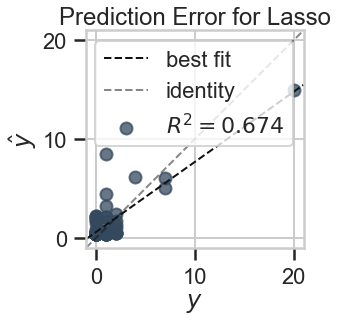

In [30]:
from sklearn.linear_model import Lasso
from yellowbrick.regressor import prediction_error

# Instantiate the linear model and visualizer
model = Lasso(random_state=0)
visualizer = prediction_error(model, X_train, y_train, X_test, y_test)

## Elastic Net

In [31]:
from sklearn.linear_model import ElasticNetCV
regr = ElasticNetCV(cv=5, random_state=0,max_iter=2000)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score", metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 0.8846093029034815
Mean Squared Error: 2.5912051170999866
Root Mean Squared Error: 1.6097220620653698
R2 Score 0.5602194744879634


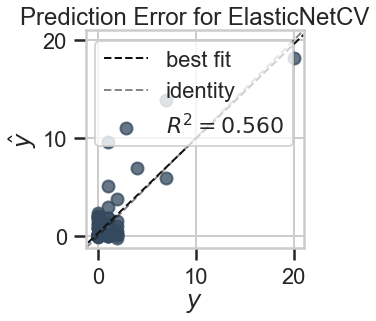

In [32]:
visualizer = prediction_error(regr, X_train, y_train, X_test, y_test)

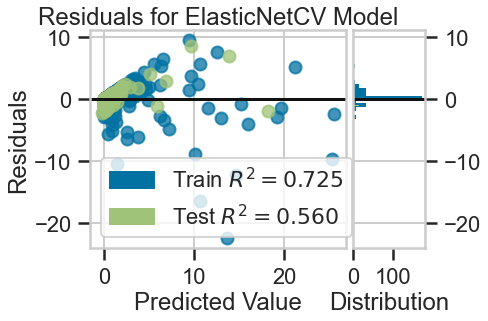

In [33]:
# Create the visualizer, fit, score, and show it
viz = residuals_plot(regr, X_train, y_train, X_test, y_test)

# Deep Learning

In [34]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
# from tensorflow.keras.layers.experimental import preprocessing

from numpy import sqrt
from tensorflow.keras.callbacks import EarlyStopping

In [35]:
from sklearn import preprocessing
mm_scaler = preprocessing.MinMaxScaler()
X_train = mm_scaler.fit_transform(X_train)
X_test = mm_scaler.transform(X_test)

In [36]:
n_features = X_train.shape[1]
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1))
# compile the model
model.compile(optimizer='adam', loss='mae')
# configure early stopping
es = EarlyStopping(monitor='val_loss', patience=10)
# fit the model
history = model.fit(X_train, y_train, epochs=500, batch_size=32, verbose=1,validation_split=0.3, callbacks=[es])

W0107 18:30:25.086327 4491795904 deprecation.py:506] From /Users/michaelburak/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/tensorflow_core/python/ops/resource_variable_ops.py:1630: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Train on 236 samples, validate on 102 samples
Epoch 1/500
236/236 [==============================] - 0s 778us/sample - loss: 1.7764 - val_loss: 1.6544
Epoch 2/500
236/236 [==============================] - 0s 65us/sample - loss: 1.7440 - val_loss: 1.6380
Epoch 3/500
236/236 [==============================] - 0s 53us/sample - loss: 1.7246 - val_loss: 1.6325
Epoch 4/500
236/236 [==============================] - 0s 56us/sample - loss: 1.7139 - val_loss: 1.6270
Epoch 5/500
236/236 [==============================] - 0s 57us/sample - loss: 1.7055 - val_loss: 1.6199
Epoch 6/500
236/236 [==============================] - 0s 50us/sample - loss: 1.6956 - val_loss: 1.6113
Epoch 7/500
236/236 [==============================] - 0s 52us/sample - loss: 1.6875 - val_loss: 1.6054
Epoch 8/500
236/236 [==============================] - 0s 55us/sample - loss: 1.6803 - val_loss: 1.5999
Epoch 9/500
236/236 [==============================] - 0s 51us/sample - loss: 1.6727 - val_loss: 1.5956
Epoch 10/500
236/

236/236 [==============================] - 0s 67us/sample - loss: 0.5680 - val_loss: 0.8965
Epoch 79/500
236/236 [==============================] - 0s 62us/sample - loss: 0.5597 - val_loss: 0.8896
Epoch 80/500
236/236 [==============================] - 0s 42us/sample - loss: 0.5511 - val_loss: 0.8915
Epoch 81/500
236/236 [==============================] - 0s 63us/sample - loss: 0.5443 - val_loss: 0.8912
Epoch 82/500
236/236 [==============================] - 0s 56us/sample - loss: 0.5406 - val_loss: 0.8948
Epoch 83/500
236/236 [==============================] - 0s 48us/sample - loss: 0.5341 - val_loss: 0.8876
Epoch 84/500
236/236 [==============================] - 0s 46us/sample - loss: 0.5289 - val_loss: 0.8940
Epoch 85/500
236/236 [==============================] - 0s 40us/sample - loss: 0.5182 - val_loss: 0.8802
Epoch 86/500
236/236 [==============================] - 0s 39us/sample - loss: 0.5140 - val_loss: 0.8871
Epoch 87/500
236/236 [==============================] - 0s 40us/samp

In [37]:
# evaluate the model
error = model.evaluate(X_test, y_test, verbose=0)
print('MSE: %.3f, RMSE: %.3f' % (error, sqrt(error)))

MSE: 0.905, RMSE: 0.951


In [38]:
y_test.mean()

0.8823529411764706

In [39]:
X_test

array([[0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 1., 1., 0.]])

# Kerasregressor (Source: https://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/ )

In [40]:

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

Using TensorFlow backend.


In [41]:
# define base model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(13, input_dim=n_features, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [42]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
# evaluate model with standardized dataset
estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=100, batch_size=5, verbose=1)
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(estimator, X_train, y_train, scoring="r2", cv=kfold, n_jobs=1)
print("Results: %.2f (%.2f) R2" % (results.mean(), results.std()))

/Users/michaelburak/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
W0107 18:30:53.870512 4491795904 module_wrapper.py:139] From /Users/michaelburak/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0107 18:30:53.871534 4491795904 module_wrapper.py:139] From /Users/michaelburak/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0107 18:30:53.873191 4491795904 module_wrapper.py:139] From /Users/michaelburak/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/keras/b

Epoch 1/1
34/34 [==============================] - 0s 852us/step
Epoch 1/1
34/34 [==============================] - 0s 1ms/step
Epoch 1/1
34/34 [==============================] - 0s 2ms/step
Epoch 1/1
34/34 [==============================] - 0s 2ms/step
Epoch 1/1
34/34 [==============================] - 0s 2ms/step
Epoch 1/1
34/34 [==============================] - 0s 3ms/step
Epoch 1/1
34/34 [==============================] - 0s 3ms/step
Epoch 1/1
34/34 [==============================] - 0s 3ms/step
Epoch 1/1
33/33 [==============================] - 0s 4ms/step
Epoch 1/1
33/33 [==============================] - 0s 4ms/step
Results: -0.16 (0.09) R2


In [43]:
# define the model
def larger_model():
    # create model
    model = Sequential()
    model.add(Dense(13, input_dim=n_features, kernel_initializer='normal', activation='relu'))
    model.add(Dense(6, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [44]:
# evaluate model with standardized dataset
estimators = []
estimators.append(('standardize', mm_scaler))
estimators.append(('mlp', KerasRegressor(build_fn=larger_model, epochs=100, batch_size=5, verbose=1)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10)
results = cross_val_score(pipeline, X_train, y_train, scoring="r2", cv=kfold, n_jobs=1)
print("Larger: %.2f (%.2f) R2" % (results.mean(), results.std()))

Epoch 1/100
304/304 [==============================] - 1s 2ms/step - loss: 23.8616
Epoch 2/100
304/304 [==============================] - 0s 148us/step - loss: 23.6272
Epoch 3/100
304/304 [==============================] - 0s 139us/step - loss: 22.9117
Epoch 4/100
304/304 [==============================] - 0s 142us/step - loss: 21.3907
Epoch 5/100
304/304 [==============================] - 0s 138us/step - loss: 19.2946
Epoch 6/100
304/304 [==============================] - 0s 139us/step - loss: 17.5707
Epoch 7/100
304/304 [==============================] - 0s 139us/step - loss: 16.0658
Epoch 8/100
304/304 [==============================] - 0s 137us/step - loss: 14.6145
Epoch 9/100
304/304 [==============================] - 0s 139us/step - loss: 13.4236
Epoch 10/100
304/304 [==============================] - 0s 137us/step - loss: 12.1505
Epoch 11/100
304/304 [==============================] - 0s 140us/step - loss: 10.8874
Epoch 12/100
304/304 [==============================] - 0s 140us/

304/304 [==============================] - 0s 139us/step - loss: 0.4656
Epoch 98/100
304/304 [==============================] - 0s 144us/step - loss: 0.4632
Epoch 99/100
304/304 [==============================] - 0s 134us/step - loss: 0.4705
Epoch 100/100
34/34 [==============================] - 0s 5ms/step
Epoch 1/100
304/304 [==============================] - 1s 2ms/step - loss: 19.6466
Epoch 2/100
304/304 [==============================] - 0s 168us/step - loss: 19.5302
Epoch 3/100
304/304 [==============================] - 0s 157us/step - loss: 19.4246
Epoch 4/100
304/304 [==============================] - 0s 153us/step - loss: 19.3229
Epoch 5/100
304/304 [==============================] - 0s 156us/step - loss: 19.2254
Epoch 6/100
304/304 [==============================] - 0s 159us/step - loss: 19.1350
Epoch 7/100
304/304 [==============================] - 0s 153us/step - loss: 19.0467
Epoch 8/100
304/304 [==============================] - 0s 159us/step - loss: 18.9666
Epoch 9/100
3

Epoch 92/100
304/304 [==============================] - 0s 138us/step - loss: 17.4708
Epoch 93/100
304/304 [==============================] - 0s 141us/step - loss: 17.4696
Epoch 94/100
304/304 [==============================] - 0s 165us/step - loss: 17.4695
Epoch 95/100
304/304 [==============================] - 0s 169us/step - loss: 17.4684
Epoch 96/100
304/304 [==============================] - 0s 140us/step - loss: 17.4681
Epoch 97/100
304/304 [==============================] - 0s 140us/step - loss: 17.4682
Epoch 98/100
304/304 [==============================] - 0s 143us/step - loss: 17.4680
Epoch 99/100
304/304 [==============================] - 0s 140us/step - loss: 17.4672
Epoch 100/100
34/34 [==============================] - 0s 5ms/step
Epoch 1/100
304/304 [==============================] - 1s 2ms/step - loss: 23.2033
Epoch 2/100
304/304 [==============================] - 0s 174us/step - loss: 22.9243
Epoch 3/100
304/304 [==============================] - 0s 148us/step - loss: 

304/304 [==============================] - 0s 141us/step - loss: 0.9747
Epoch 88/100
304/304 [==============================] - 0s 138us/step - loss: 0.9595
Epoch 89/100
304/304 [==============================] - 0s 139us/step - loss: 0.9433
Epoch 90/100
304/304 [==============================] - 0s 146us/step - loss: 0.9420
Epoch 91/100
304/304 [==============================] - 0s 138us/step - loss: 0.9211
Epoch 92/100
304/304 [==============================] - 0s 143us/step - loss: 0.9164
Epoch 93/100
304/304 [==============================] - 0s 146us/step - loss: 0.9088
Epoch 94/100
304/304 [==============================] - 0s 142us/step - loss: 0.8953
Epoch 95/100
304/304 [==============================] - 0s 146us/step - loss: 0.8751
Epoch 96/100
304/304 [==============================] - 0s 144us/step - loss: 0.8685
Epoch 97/100
304/304 [==============================] - 0s 143us/step - loss: 0.8535
Epoch 98/100
304/304 [==============================] - 0s 146us/step - loss: 

304/304 [==============================] - 0s 138us/step - loss: 0.7777
Epoch 83/100
304/304 [==============================] - 0s 128us/step - loss: 0.7519
Epoch 84/100
304/304 [==============================] - 0s 126us/step - loss: 0.7331
Epoch 85/100
304/304 [==============================] - 0s 129us/step - loss: 0.7451
Epoch 86/100
304/304 [==============================] - 0s 137us/step - loss: 0.6965
Epoch 87/100
304/304 [==============================] - 0s 136us/step - loss: 0.6701
Epoch 88/100
304/304 [==============================] - 0s 133us/step - loss: 0.6558
Epoch 89/100
304/304 [==============================] - 0s 146us/step - loss: 0.6805
Epoch 90/100
304/304 [==============================] - 0s 145us/step - loss: 0.6526
Epoch 91/100
304/304 [==============================] - 0s 137us/step - loss: 0.6308
Epoch 92/100
304/304 [==============================] - 0s 138us/step - loss: 0.6201
Epoch 93/100
304/304 [==============================] - 0s 134us/step - loss: 

304/304 [==============================] - 0s 158us/step - loss: 0.9191
Epoch 78/100
304/304 [==============================] - 0s 142us/step - loss: 0.9166
Epoch 79/100
304/304 [==============================] - 0s 148us/step - loss: 0.8930
Epoch 80/100
304/304 [==============================] - 0s 142us/step - loss: 0.8817
Epoch 81/100
304/304 [==============================] - 0s 135us/step - loss: 0.8787
Epoch 82/100
304/304 [==============================] - 0s 132us/step - loss: 0.8823
Epoch 83/100
304/304 [==============================] - 0s 139us/step - loss: 0.8384
Epoch 84/100
304/304 [==============================] - 0s 138us/step - loss: 0.8506
Epoch 85/100
304/304 [==============================] - 0s 131us/step - loss: 0.8169
Epoch 86/100
304/304 [==============================] - 0s 150us/step - loss: 0.8333
Epoch 87/100
304/304 [==============================] - 0s 151us/step - loss: 0.8097
Epoch 88/100
304/304 [==============================] - 0s 133us/step - loss: 

304/304 [==============================] - 0s 152us/step - loss: 1.1773
Epoch 73/100
304/304 [==============================] - 0s 149us/step - loss: 1.1704
Epoch 74/100
304/304 [==============================] - 0s 136us/step - loss: 1.1422
Epoch 75/100
304/304 [==============================] - 0s 131us/step - loss: 1.1368
Epoch 76/100
304/304 [==============================] - 0s 136us/step - loss: 1.1095
Epoch 77/100
304/304 [==============================] - 0s 148us/step - loss: 1.1046
Epoch 78/100
304/304 [==============================] - 0s 138us/step - loss: 1.0535
Epoch 79/100
304/304 [==============================] - 0s 145us/step - loss: 1.0550
Epoch 80/100
304/304 [==============================] - 0s 125us/step - loss: 1.0263
Epoch 81/100
304/304 [==============================] - 0s 129us/step - loss: 1.0207
Epoch 82/100
304/304 [==============================] - 0s 125us/step - loss: 0.9950
Epoch 83/100
304/304 [==============================] - 0s 127us/step - loss: 

304/304 [==============================] - 0s 145us/step - loss: 1.1442
Epoch 68/100
304/304 [==============================] - 0s 147us/step - loss: 1.1164
Epoch 69/100
304/304 [==============================] - 0s 149us/step - loss: 1.1087
Epoch 70/100
304/304 [==============================] - 0s 150us/step - loss: 1.0871
Epoch 71/100
304/304 [==============================] - 0s 158us/step - loss: 1.0536
Epoch 72/100
304/304 [==============================] - 0s 192us/step - loss: 1.0435
Epoch 73/100
304/304 [==============================] - 0s 153us/step - loss: 1.0441
Epoch 74/100
304/304 [==============================] - 0s 149us/step - loss: 0.9962
Epoch 75/100
304/304 [==============================] - 0s 150us/step - loss: 0.9909
Epoch 76/100
304/304 [==============================] - 0s 148us/step - loss: 0.9749
Epoch 77/100
304/304 [==============================] - 0s 150us/step - loss: 0.9457
Epoch 78/100
304/304 [==============================] - 0s 143us/step - loss: 

304/304 [==============================] - 0s 144us/step - loss: 1.0676
Epoch 63/100
304/304 [==============================] - 0s 139us/step - loss: 1.0432
Epoch 64/100
304/304 [==============================] - 0s 148us/step - loss: 1.0680
Epoch 65/100
304/304 [==============================] - 0s 150us/step - loss: 0.9864
Epoch 66/100
304/304 [==============================] - 0s 140us/step - loss: 1.0221
Epoch 67/100
304/304 [==============================] - 0s 154us/step - loss: 0.9838
Epoch 68/100
304/304 [==============================] - 0s 147us/step - loss: 0.9532
Epoch 69/100
304/304 [==============================] - 0s 138us/step - loss: 0.9381
Epoch 70/100
304/304 [==============================] - 0s 175us/step - loss: 0.9006
Epoch 71/100
304/304 [==============================] - 0s 164us/step - loss: 0.8906
Epoch 72/100
304/304 [==============================] - 0s 154us/step - loss: 0.8785
Epoch 73/100
304/304 [==============================] - 0s 160us/step - loss: 

305/305 [==============================] - 0s 239us/step - loss: 1.1042
Epoch 58/100
305/305 [==============================] - 0s 237us/step - loss: 1.1112
Epoch 59/100
305/305 [==============================] - 0s 213us/step - loss: 1.1077
Epoch 60/100
305/305 [==============================] - 0s 193us/step - loss: 1.0408
Epoch 61/100
305/305 [==============================] - 0s 161us/step - loss: 1.0327
Epoch 62/100
305/305 [==============================] - 0s 156us/step - loss: 1.0204
Epoch 63/100
305/305 [==============================] - 0s 222us/step - loss: 0.9794
Epoch 64/100
305/305 [==============================] - 0s 197us/step - loss: 0.9699
Epoch 65/100
305/305 [==============================] - 0s 193us/step - loss: 0.9489
Epoch 66/100
305/305 [==============================] - 0s 184us/step - loss: 0.9525
Epoch 67/100
305/305 [==============================] - 0s 183us/step - loss: 0.9340
Epoch 68/100
305/305 [==============================] - 0s 205us/step - loss: 

305/305 [==============================] - 0s 178us/step - loss: 1.7605
Epoch 53/100
305/305 [==============================] - 0s 175us/step - loss: 1.7634
Epoch 54/100
305/305 [==============================] - 0s 187us/step - loss: 1.7408
Epoch 55/100
305/305 [==============================] - 0s 183us/step - loss: 1.6907
Epoch 56/100
305/305 [==============================] - 0s 183us/step - loss: 1.6456
Epoch 57/100
305/305 [==============================] - 0s 172us/step - loss: 1.6766
Epoch 58/100
305/305 [==============================] - 0s 188us/step - loss: 1.6055
Epoch 59/100
305/305 [==============================] - 0s 174us/step - loss: 1.6115
Epoch 60/100
305/305 [==============================] - 0s 177us/step - loss: 1.6090
Epoch 61/100
305/305 [==============================] - 0s 198us/step - loss: 1.5799
Epoch 62/100
305/305 [==============================] - 0s 176us/step - loss: 1.5262
Epoch 63/100
305/305 [==============================] - 0s 176us/step - loss: 

In [45]:
results

array([ 0.29036588, -0.035693  ,  0.83258462,  0.76298262,  0.70470811,
       -0.976141  , -1.9999808 ,  0.68153256, -2.48116782,  0.91302471])

## Wide chungus model

In [46]:
# define the model
def wider_model():
    # create model
    model = Sequential()
    model.add(Dense(24, input_dim=n_features, kernel_initializer='normal', activation='relu'))
    model.add(Dense(12, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mape', optimizer='adam')
    return model

In [47]:
# evaluate model with standardized dataset
k_reg= KerasRegressor(build_fn=wider_model, epochs=100, batch_size=5, verbose=1)
estimators = []
estimators.append(('standardize', mm_scaler))
estimators.append(('mlp',k_reg))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10)
results = cross_val_score(pipeline, X_train, y_train, scoring="r2", cv=kfold, n_jobs=1)
print("Larger: %.2f (%.2f) R2" % (results.mean(), results.std()))

Epoch 1/100
304/304 [==============================] - 1s 3ms/step - loss: 412052.6827
Epoch 2/100
304/304 [==============================] - 0s 191us/step - loss: 193666.3792
Epoch 3/100
304/304 [==============================] - 0s 168us/step - loss: 189696.3749
Epoch 4/100
304/304 [==============================] - 0s 182us/step - loss: 63288.7309
Epoch 5/100
304/304 [==============================] - 0s 177us/step - loss: 144331.2210
Epoch 6/100
304/304 [==============================] - 0s 175us/step - loss: 65126.3003
Epoch 7/100
304/304 [==============================] - 0s 173us/step - loss: 62630.8431
Epoch 8/100
304/304 [==============================] - 0s 164us/step - loss: 66710.7184
Epoch 9/100
304/304 [==============================] - 0s 188us/step - loss: 136724.5375
Epoch 10/100
304/304 [==============================] - 0s 188us/step - loss: 131582.9504
Epoch 11/100
304/304 [==============================] - 0s 176us/step - loss: 58698.1632
Epoch 12/100
304/304 [====

304/304 [==============================] - 0s 164us/step - loss: 87239.7999
Epoch 93/100
304/304 [==============================] - 0s 151us/step - loss: 158631.2009
Epoch 94/100
304/304 [==============================] - 0s 151us/step - loss: 63014.8962
Epoch 95/100
304/304 [==============================] - 0s 158us/step - loss: 115578.7452
Epoch 96/100
304/304 [==============================] - 0s 151us/step - loss: 78764.3010
Epoch 97/100
304/304 [==============================] - 0s 156us/step - loss: 118777.1239
Epoch 98/100
304/304 [==============================] - 0s 159us/step - loss: 135156.2827
Epoch 99/100
304/304 [==============================] - 0s 158us/step - loss: 81273.3994
Epoch 100/100
34/34 [==============================] - 0s 10ms/step
Epoch 1/100
304/304 [==============================] - 1s 3ms/step - loss: 341669.4075
Epoch 2/100
304/304 [==============================] - 0s 193us/step - loss: 132097.1241
Epoch 3/100
304/304 [==============================] 

304/304 [==============================] - 0s 183us/step - loss: 58954.0463
Epoch 84/100
304/304 [==============================] - 0s 183us/step - loss: 91364.1117
Epoch 85/100
304/304 [==============================] - 0s 186us/step - loss: 87837.3138
Epoch 86/100
304/304 [==============================] - 0s 179us/step - loss: 92717.8380
Epoch 87/100
304/304 [==============================] - 0s 191us/step - loss: 121706.5799
Epoch 88/100
304/304 [==============================] - 0s 193us/step - loss: 111127.8204
Epoch 89/100
304/304 [==============================] - 0s 189us/step - loss: 90838.6254
Epoch 90/100
304/304 [==============================] - 0s 227us/step - loss: 106669.5318
Epoch 91/100
304/304 [==============================] - 0s 175us/step - loss: 128358.4451
Epoch 92/100
304/304 [==============================] - 0s 170us/step - loss: 98746.7755
Epoch 93/100
304/304 [==============================] - 0s 165us/step - loss: 133674.5693
Epoch 94/100
304/304 [=======

304/304 [==============================] - 0s 186us/step - loss: 117545.7374
Epoch 75/100
304/304 [==============================] - 0s 195us/step - loss: 80192.6645
Epoch 76/100
304/304 [==============================] - 0s 179us/step - loss: 117765.1474
Epoch 77/100
304/304 [==============================] - 0s 183us/step - loss: 127274.0463
Epoch 78/100
304/304 [==============================] - 0s 183us/step - loss: 107502.7077
Epoch 79/100
304/304 [==============================] - 0s 178us/step - loss: 79344.2751
Epoch 80/100
304/304 [==============================] - 0s 176us/step - loss: 54741.8915
Epoch 81/100
304/304 [==============================] - 0s 187us/step - loss: 66881.4016
Epoch 82/100
304/304 [==============================] - 0s 173us/step - loss: 162257.6766
Epoch 83/100
304/304 [==============================] - 0s 180us/step - loss: 73860.4226
Epoch 84/100
304/304 [==============================] - 0s 181us/step - loss: 115806.2594
Epoch 85/100
304/304 [======

304/304 [==============================] - 0s 188us/step - loss: 87240.4962
Epoch 66/100
304/304 [==============================] - 0s 185us/step - loss: 111195.2817
Epoch 67/100
304/304 [==============================] - 0s 175us/step - loss: 99392.9424
Epoch 68/100
304/304 [==============================] - 0s 178us/step - loss: 73451.8500
Epoch 69/100
304/304 [==============================] - 0s 178us/step - loss: 91496.4857
Epoch 70/100
304/304 [==============================] - 0s 180us/step - loss: 82024.1598
Epoch 71/100
304/304 [==============================] - 0s 181us/step - loss: 128960.7602
Epoch 72/100
304/304 [==============================] - 0s 195us/step - loss: 138827.3065
Epoch 73/100
304/304 [==============================] - 0s 178us/step - loss: 100850.7495
Epoch 74/100
304/304 [==============================] - 0s 179us/step - loss: 76731.4710
Epoch 75/100
304/304 [==============================] - 0s 185us/step - loss: 131578.4993
Epoch 76/100
304/304 [=======

304/304 [==============================] - 0s 196us/step - loss: 122026.2842
Epoch 57/100
304/304 [==============================] - 0s 195us/step - loss: 152415.9569
Epoch 58/100
304/304 [==============================] - 0s 230us/step - loss: 104773.9449
Epoch 59/100
304/304 [==============================] - 0s 218us/step - loss: 93502.0398
Epoch 60/100
304/304 [==============================] - 0s 228us/step - loss: 101854.5570
Epoch 61/100
304/304 [==============================] - 0s 282us/step - loss: 72479.7828
Epoch 62/100
304/304 [==============================] - 0s 224us/step - loss: 59335.5638
Epoch 63/100
304/304 [==============================] - 0s 216us/step - loss: 63324.3536
Epoch 64/100
304/304 [==============================] - 0s 196us/step - loss: 79483.7637
Epoch 65/100
304/304 [==============================] - 0s 192us/step - loss: 110667.0386
Epoch 66/100
304/304 [==============================] - 0s 186us/step - loss: 71528.6720
Epoch 67/100
304/304 [=======

304/304 [==============================] - 0s 195us/step - loss: 149963.5431
Epoch 48/100
304/304 [==============================] - 0s 196us/step - loss: 82530.9844
Epoch 49/100
304/304 [==============================] - 0s 201us/step - loss: 73161.6237
Epoch 50/100
304/304 [==============================] - 0s 192us/step - loss: 149642.0773
Epoch 51/100
304/304 [==============================] - 0s 188us/step - loss: 129443.1425
Epoch 52/100
304/304 [==============================] - 0s 184us/step - loss: 126739.9042
Epoch 53/100
304/304 [==============================] - 0s 182us/step - loss: 88654.7211
Epoch 54/100
304/304 [==============================] - 0s 187us/step - loss: 86919.7840
Epoch 55/100
304/304 [==============================] - 0s 180us/step - loss: 97838.7221
Epoch 56/100
304/304 [==============================] - 0s 190us/step - loss: 114287.0269
Epoch 57/100
304/304 [==============================] - 0s 196us/step - loss: 112395.2492
Epoch 58/100
304/304 [======

304/304 [==============================] - 0s 193us/step - loss: 118324.6682
Epoch 39/100
304/304 [==============================] - 0s 192us/step - loss: 122644.7842
Epoch 40/100
304/304 [==============================] - 0s 211us/step - loss: 119004.6250
Epoch 41/100
304/304 [==============================] - 0s 259us/step - loss: 165631.8024
Epoch 42/100
304/304 [==============================] - 0s 260us/step - loss: 96952.2846
Epoch 43/100
304/304 [==============================] - 0s 222us/step - loss: 219022.4658
Epoch 44/100
304/304 [==============================] - 0s 210us/step - loss: 67905.5271 0s - loss: 72369.938
Epoch 45/100
304/304 [==============================] - 0s 206us/step - loss: 104673.7262
Epoch 46/100
304/304 [==============================] - 0s 212us/step - loss: 137652.3126
Epoch 47/100
304/304 [==============================] - 0s 188us/step - loss: 67576.7707
Epoch 48/100
304/304 [==============================] - 0s 197us/step - loss: 82876.0922
Epoch 

304/304 [==============================] - 0s 192us/step - loss: 104808.7474
Epoch 29/100
304/304 [==============================] - 0s 197us/step - loss: 93670.2930
Epoch 30/100
304/304 [==============================] - 0s 192us/step - loss: 80077.7570
Epoch 31/100
304/304 [==============================] - 0s 196us/step - loss: 95906.9728
Epoch 32/100
304/304 [==============================] - 0s 198us/step - loss: 208684.8058
Epoch 33/100
304/304 [==============================] - 0s 191us/step - loss: 116388.0958
Epoch 34/100
304/304 [==============================] - 0s 187us/step - loss: 100636.6605
Epoch 35/100
304/304 [==============================] - 0s 189us/step - loss: 91863.4048
Epoch 36/100
304/304 [==============================] - 0s 190us/step - loss: 159269.6046
Epoch 37/100
304/304 [==============================] - 0s 195us/step - loss: 123990.7864
Epoch 38/100
304/304 [==============================] - 0s 194us/step - loss: 122238.3166
Epoch 39/100
304/304 [=====

305/305 [==============================] - 0s 200us/step - loss: 104444.7979
Epoch 20/100
305/305 [==============================] - 0s 212us/step - loss: 79645.7467
Epoch 21/100
305/305 [==============================] - 0s 219us/step - loss: 45761.8409
Epoch 22/100
305/305 [==============================] - 0s 242us/step - loss: 97530.8474
Epoch 23/100
305/305 [==============================] - 0s 255us/step - loss: 198436.8919
Epoch 24/100
305/305 [==============================] - 0s 256us/step - loss: 111756.1830
Epoch 25/100
305/305 [==============================] - 0s 244us/step - loss: 88290.6432
Epoch 26/100
305/305 [==============================] - 0s 186us/step - loss: 164116.3744
Epoch 27/100
305/305 [==============================] - 0s 231us/step - loss: 120466.4220
Epoch 28/100
305/305 [==============================] - 0s 184us/step - loss: 101694.4995
Epoch 29/100
305/305 [==============================] - 0s 163us/step - loss: 71421.0937
Epoch 30/100
305/305 [======

305/305 [==============================] - 0s 213us/step - loss: 185037.1838
Epoch 11/100
305/305 [==============================] - 0s 233us/step - loss: 67632.4938
Epoch 12/100
305/305 [==============================] - 0s 212us/step - loss: 82222.2751
Epoch 13/100
305/305 [==============================] - 0s 192us/step - loss: 144256.9490
Epoch 14/100
305/305 [==============================] - 0s 197us/step - loss: 92597.3964
Epoch 15/100
305/305 [==============================] - 0s 198us/step - loss: 104494.3460
Epoch 16/100
305/305 [==============================] - 0s 180us/step - loss: 89530.1169
Epoch 17/100
305/305 [==============================] - 0s 202us/step - loss: 148656.4977
Epoch 18/100
305/305 [==============================] - 0s 215us/step - loss: 165732.4538
Epoch 19/100
305/305 [==============================] - 0s 201us/step - loss: 115303.6046
Epoch 20/100
305/305 [==============================] - 0s 219us/step - loss: 107484.8730
Epoch 21/100
305/305 [=====

In [48]:
k_reg.get_params()

{'epochs': 100,
 'batch_size': 5,
 'verbose': 1,
 'build_fn': <function __main__.wider_model()>}

In [49]:
results

array([-0.15542584, -0.12792659, -0.15015567, -0.13132934, -0.18691755,
       -0.43468305, -0.1195917 , -0.13436936, -0.30995012, -0.17199406])

# Grid chungus search

In [50]:
params = {'activation': ["relu", "tanh"],
          'batch_size': [16, 32, 64], 
          'epochs': [50, 100],
          'learning_rate': [0.01, 0.001, 0.0001]}

In [51]:
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
learning_rate= [0.01, 0.001, 0.0001]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(scoring="r2",estimator=KerasRegressor(build_fn=wider_model, verbose=1), param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Epoch 1/100
338/338 [==============================] - 2s 5ms/step - loss: 552970.2011
Epoch 2/100
338/338 [==============================] - 0s 108us/step - loss: 211496.1451
Epoch 3/100
338/338 [==============================] - 0s 107us/step - loss: 153251.3624
Epoch 4/100
338/338 [==============================] - 0s 106us/step - loss: 114156.8161
Epoch 5/100
338/338 [==============================] - 0s 110us/step - loss: 107559.8976
Epoch 6/100
338/338 [==============================] - 0s 109us/step - loss: 64255.1987
Epoch 7/100
338/338 [==============================] - 0s 209us/step - loss: 76134.3670
Epoch 8/100
338/338 [==============================] - 0s 128us/step - loss: 89538.8922
Epoch 9/100
338/338 [==============================] - 0s 96us/step - loss: 71500.2045
Epoch 10/100
338/338 [==============================] - 0s 101us/step - loss: 95441.3773
Epoch 11/100
338/338 [==============================] - 0s 100us/step - loss: 77350.1186
Epoch 12/100
338/338 [======

338/338 [==============================] - 0s 116us/step - loss: 133292.1268
Epoch 93/100
338/338 [==============================] - 0s 125us/step - loss: 57897.3308
Epoch 94/100
338/338 [==============================] - 0s 121us/step - loss: 110757.3215
Epoch 95/100
338/338 [==============================] - 0s 104us/step - loss: 118379.6656
Epoch 96/100
338/338 [==============================] - 0s 101us/step - loss: 106282.8778
Epoch 97/100
338/338 [==============================] - 0s 102us/step - loss: 48803.9360
Epoch 98/100
338/338 [==============================] - 0s 127us/step - loss: 81879.1164
Epoch 99/100
338/338 [==============================] - 0s 112us/step - loss: 92728.0520
Epoch 100/100
338/338 [==============================] - 0s 104us/step - loss: 90542.2840
Best: -0.161121 using {'batch_size': 10, 'epochs': 100}
-0.161898 (0.052710) with: {'batch_size': 10, 'epochs': 10}
-0.161133 (0.053372) with: {'batch_size': 10, 'epochs': 50}
-0.161121 (0.053205) with: {'ba